In [1]:
import torch
import matplotlib.pyplot as plt
import numpy
from model import * 
from dataset import * 

ngpu = 1
nz = 3 # size of latent variable
np = 3
width = 1 # width = nz / np
batchSize = 1


dataset = SyntheticData()
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batchSize,
                                         shuffle=True, num_workers=2)

In [2]:
netE = Encoder()
netG = Generator()


netE.load_state_dict(torch.load("./trained-models/final_netE.pth"))
netG.load_state_dict(torch.load("./trained-models/final_netG.pth"))

<All keys matched successfully>

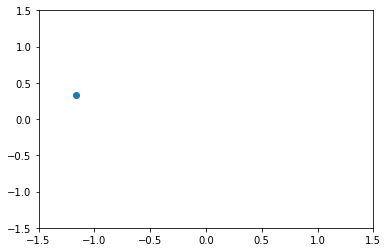

In [11]:
ground_truth = next(iter(dataloader))
plt.scatter(ground_truth[:, 1], ground_truth[:, 2])
plt.ylim([-1.5, 1.5])
plt.xlim([-1.5, 1.5])
plt.show()

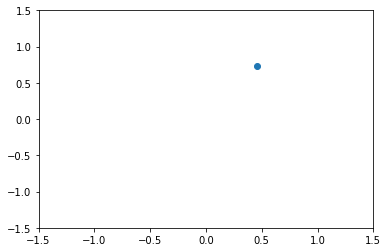

In [12]:
latent = netE(ground_truth)
reconstructed = netG(latent)
plt.scatter(reconstructed.detach()[:, 1], reconstructed.detach()[:, 2])
plt.ylim([-1.5, 1.5])
plt.xlim([-1.5, 1.5])
plt.show()

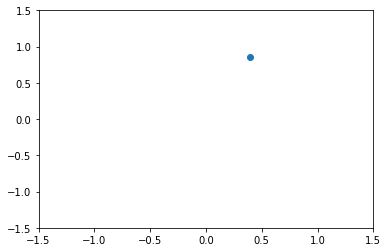

In [13]:
noise = torch.randn(batchSize, nz)
fake = netG(noise)
plt.scatter(fake.detach()[:, 1], fake.detach()[:, 2])
plt.ylim([-1.5, 1.5])
plt.xlim([-1.5, 1.5])
plt.show()

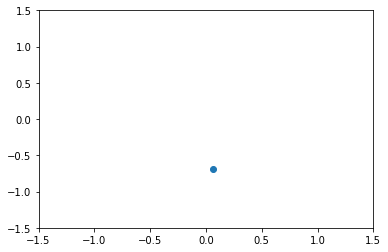

In [16]:
interpolated_latent = latent.clone()
interpolated_latent[:, 0:width] = noise[:, 0:width]
interpolated_fake = netG(interpolated_latent)
plt.scatter(interpolated_fake.detach()[:, 1], interpolated_fake.detach()[:, 2])
plt.ylim([-1.5, 1.5])
plt.xlim([-1.5, 1.5])
plt.show()

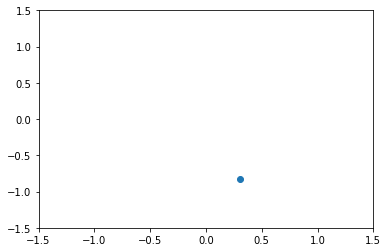

In [17]:
interpolated_latent = latent.clone()
interpolated_latent[:, 1*width:2*width] = noise[:, 0:width]
interpolated_fake = netG(interpolated_latent)
plt.scatter(interpolated_fake.detach()[:, 1], interpolated_fake.detach()[:, 2])
plt.ylim([-1.5, 1.5])
plt.xlim([-1.5, 1.5])
plt.show()

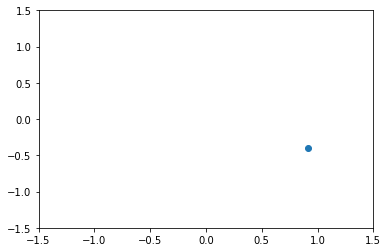

In [18]:
interpolated_latent = latent.clone()
interpolated_latent[:, 2*width:3*width] = noise[:, 0:width]
interpolated_fake = netG(interpolated_latent)
plt.scatter(interpolated_fake.detach()[:, 1], interpolated_fake.detach()[:, 2])
plt.ylim([-1.5, 1.5])
plt.xlim([-1.5, 1.5])
plt.show()

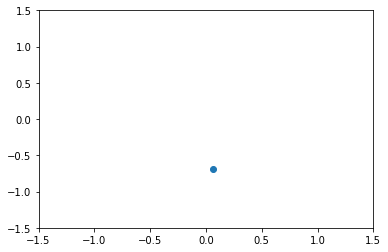

In [19]:
interpolated_latent = latent.clone()
interpolated_latent[:, 0:2*width] = noise[:, 0:2*width]
interpolated_fake = netG(interpolated_latent)
plt.scatter(interpolated_fake.detach()[:, 1], interpolated_fake.detach()[:, 2])
plt.ylim([-1.5, 1.5])
plt.xlim([-1.5, 1.5])
plt.show()

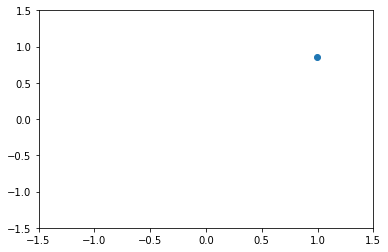

In [21]:
interpolated_latent = latent.clone()
interpolated_latent[:, 1:3*width] = noise[:, 1:3*width]
interpolated_fake = netG(interpolated_latent)
plt.scatter(interpolated_fake.detach()[:, 1], interpolated_fake.detach()[:, 2])
plt.ylim([-1.5, 1.5])
plt.xlim([-1.5, 1.5])
plt.show()

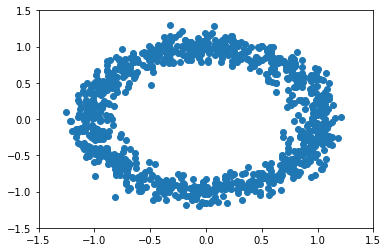

In [17]:
import math
noise = torch.randn((1000, 3))
# for i in range(1000):
#     theta = torch.rand((1)) * 2 * math.pi
#     noise[i, 0] = theta.item()
#     noise[i, 1] = torch.cos(theta).item() + 0.1 * torch.randn((1)).item()
#     noise[i, 2] = torch.sin(theta).item() + 0.1 * torch.randn((1)).item()
fake = netG(noise)
plt.scatter(fake.detach()[:, 1], fake.detach()[:, 2])
plt.ylim([-1.5, 1.5])
plt.xlim([-1.5, 1.5])
plt.show()